# Model evaluation

## Regression

In [17]:
import numpy as np
from numpy.typing import NDArray

from typing import Annotated
import matplotlib.pyplot as plt
import logging

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.math import sigmoid

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

import utils

print(f'Tensorflow version : {tf.__version__}')
print(f'Using GPU: {"no" if len(tf.config.list_physical_devices("GPU")) == 0 else "yes"}.')

# prevent tensorflow from using all the GPU memory
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    print(e)
logging.getLogger('tensorflow').setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

Tensorflow version : 2.18.0
Using GPU: yes.


In [2]:
def generate_models():
    
    tf.random.set_seed(20)
    
    yield Sequential(
        [
            Dense(25, activation = 'relu'),
            Dense(15, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_1'
    )

    yield Sequential(
        [
            Dense(20, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(20, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_2'
    )

    yield Sequential(
        [
            Dense(32, activation = 'relu'),
            Dense(16, activation = 'relu'),
            Dense(8, activation = 'relu'),
            Dense(4, activation = 'relu'),
            Dense(12, activation = 'relu'),
            Dense(1, activation = 'linear')
        ],
        name='model_3'
    )

In [3]:
# Load the dataset from the text file
data = np.loadtxt('./data/data_w3_ex1.csv', delimiter=',')

# Split the inputs and outputs into separate arrays
x = data[:,0]
y = data[:,1]

# Convert 1-D arrays into 2-D because the commands later will require it
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

print(f"the shape of the inputs x is: {x.shape}")
print(f"the shape of the targets y is: {y.shape}")



the shape of the inputs x is: (50, 1)
the shape of the targets y is: (50, 1)


training set (input) is: (30, 1)
training set (target) is: (30, 1)

cross validation set (input) is: (10, 1)
cross validation set (target) is: (10, 1)

test set (input) is: (10, 1)
test set (target) is: (10, 1)


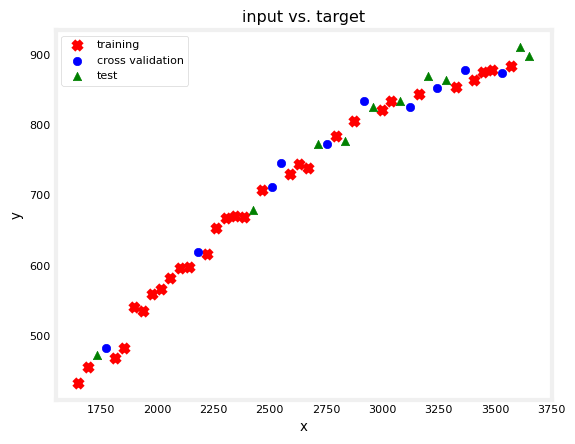

In [4]:
x_train, x_valtest, y_train, y_valtest = train_test_split(x, y, test_size=0.40, random_state=1)

x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, test_size=0.5, random_state=1)

del x_valtest, y_valtest

print(f"training set (input) is: {x_train.shape}")
print(f"training set (target) is: {y_train.shape}\n")
print(f"cross validation set (input) is: {x_val.shape}")
print(f"cross validation set (target) is: {y_val.shape}\n")
print(f"test set (input) is: {x_test.shape}")
print(f"test set (target) is: {y_test.shape}")

utils.plot_train_cv_test(x_train, y_train, x_val, y_val, x_test, y_test, title="input vs. target")

In [5]:
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_val_mapped = poly.transform(x_val)
X_test_mapped = poly.transform(x_test)

scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_val_mapped_scaled = scaler.transform(X_val_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

In [6]:
train_mses = []
val_mses = []

In [ ]:

models = []

for model in generate_models():
  model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1)
  )

  print(f'\nTraining {model.name}...\n')
  model.fit(
    X_train_mapped_scaled,
    y_train,
    epochs=300,
    verbose=0
  )
  print(f'\nDone training {model.name}')

  print(f'Scoring errors for {model.name}...')
  yhat_train = model.predict(X_train_mapped_scaled, verbose=0)
  train_mse = mean_squared_error(y_train, yhat_train) / 2 # in sklearn mse = (err)**2 / m, not (err)**2 / 2*m
  train_mses.append(train_mse)
  print(f'MSE: {train_mse}')

  yhat_val = model.predict(X_val_mapped_scaled, verbose=0)
  val_mse = mean_squared_error(y_val, yhat_val) / 2
  val_mses.append(val_mse)
  print(f'\nDone\n')

  models.append(model)


I0000 00:00:1763691903.393128  232263 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14257 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6



Training model_1...



I0000 00:00:1763691904.057626  232450 service.cc:148] XLA service 0x7fa474007f60 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763691904.057649  232450 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Laptop GPU, Compute Capability 8.6
2025-11-21 02:25:04.070785: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1763691904.132158  232450 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1763691904.637848  232450 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.



Done training model_1
Scoring errors for model_1...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
MSE: 73.27944391935391

Done


Training model_2...


Done training model_2
Scoring errors for model_2...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
MSE: 72.86692629540165

Done


Training model_3...


Done training model_3
Scoring errors for model_3...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
MSE: 406.62804239720384

Done



In [8]:

for i, model in enumerate(range(len(models))):
  print(f'\nModel {i+1}:')
  print(f'  Train MSE: {train_mses[i]}')
  print(f'  Validation MSE: {val_mses[i]}')


Model 1:
  Train MSE: 73.27944391935391
  Validation MSE: 109.71163781708181

Model 2:
  Train MSE: 72.86692629540165
  Validation MSE: 113.8765993289179

Model 3:
  Train MSE: 406.62804239720384
  Validation MSE: 548.7674899483072


In [9]:
model_n = 2 # the model with the lowest MSE

print(f'Model {model_n}:')
print(f'  Train MSE:                  {train_mses[model_n - 1]}')
print(f'  Validation MSE:             {val_mses[model_n - 1]}')

yhat_test = models[model_n - 1].predict(X_test_mapped_scaled, verbose=0)
test_mse = mean_squared_error(y_test, yhat_test) / 2
print(f'  Test MSE:                   {test_mse}')

Model 2:
  Train MSE:                  72.86692629540165
  Validation MSE:             113.8765993289179
  Test MSE:                   132.6876830271048


## Classification

the shape of the inputs x is: (200, 2)
the shape of the targets y is: (200, 1)


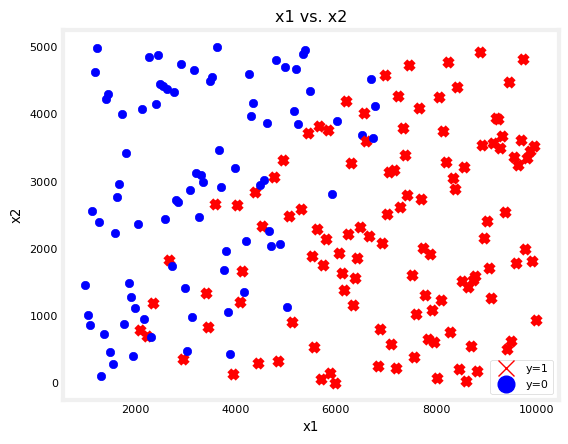

In [18]:
# Load the dataset from a text file
data = np.loadtxt('./data/data_w3_ex2.csv', delimiter=',')

# Split the inputs and outputs into separate arrays
x_bc = data[:,:-1]
y_bc = data[:,-1]

# Convert y into 2-D because the commands later will require it (x is already 2-D)
y_bc = np.expand_dims(y_bc, axis=1)

print(f"the shape of the inputs x is: {x_bc.shape}")
print(f"the shape of the targets y is: {y_bc.shape}")

utils.plot_bc_dataset(x=x_bc, y=y_bc, title="x1 vs. x2")

In [19]:
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables.
x_bc_train, x_, y_bc_train, y_ = train_test_split(x_bc, y_bc, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_bc_cv, x_bc_test, y_bc_cv, y_bc_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_bc_train.shape}")
print(f"the shape of the training set (target) is: {y_bc_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_bc_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_bc_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_bc_test.shape}")
print(f"the shape of the test set (target) is: {y_bc_test.shape}")

the shape of the training set (input) is: (120, 2)
the shape of the training set (target) is: (120, 1)

the shape of the cross validation set (input) is: (40, 2)
the shape of the cross validation set (target) is: (40, 1)

the shape of the test set (input) is: (40, 2)
the shape of the test set (target) is: (40, 1)


In [20]:
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
x_bc_train_scaled = scaler_linear.fit_transform(x_bc_train)
x_bc_cv_scaled = scaler_linear.transform(x_bc_cv)
x_bc_test_scaled = scaler_linear.transform(x_bc_test)

training set (input) is: (30, 1)
training set (target) is: (30, 1)

cross validation set (input) is: (10, 1)
cross validation set (target) is: (10, 1)

test set (input) is: (10, 1)
test set (target) is: (10, 1)


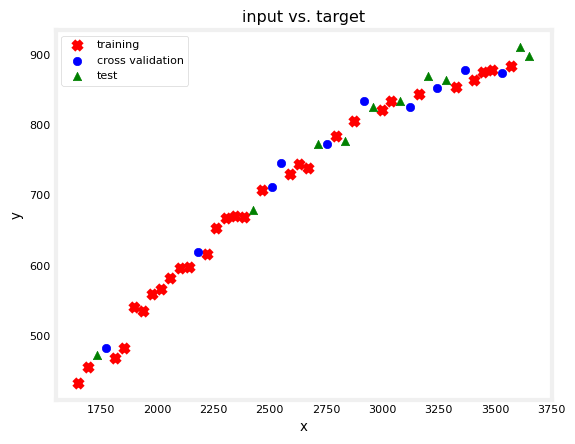

In [21]:
x_train, x_valtest, y_train, y_valtest = train_test_split(x, y, test_size=0.40, random_state=1)

x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, test_size=0.5, random_state=1)

del x_valtest, y_valtest

print(f"training set (input) is: {x_train.shape}")
print(f"training set (target) is: {y_train.shape}\n")
print(f"cross validation set (input) is: {x_val.shape}")
print(f"cross validation set (target) is: {y_val.shape}\n")
print(f"test set (input) is: {x_test.shape}")
print(f"test set (target) is: {y_test.shape}")

utils.plot_train_cv_test(x_train, y_train, x_val, y_val, x_test, y_test, title="input vs. target")

In [22]:
train_errors = []
validation_errors = []

In [23]:
models = []

for model in generate_models():
  model.compile(
    loss=BinaryCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.01)
  )

  print(f'\nTraining {model.name}...\n')
  model.fit(
    x_bc_train_scaled,
    y_bc_train,
    epochs=200,
    verbose=0
  )
  print(f'\nDone training {model.name}')

  print(f'Scoring errors for {model.name}...')
  threshold = 0.5

  yhat_train = model.predict(x_bc_train_scaled, verbose=0)
  yhat_train = sigmoid(yhat_train)
  yhat_train = np.where(yhat_train >= threshold, 1, 0)
  train_error = np.mean(yhat_train != y_bc_train)
  print(f'Train error: {train_error}')
  train_errors.append(train_error)

  yhat_cv = model.predict(x_bc_cv_scaled, verbose=0)
  yhat_cv = sigmoid(yhat_cv)
  yhat_cv = np.where(yhat_cv >= threshold, 1, 0)
  validation_error = np.mean(yhat_train != y_bc_train)
  print(f'Validation error: {train_error}')
  validation_errors.append(validation_error)


  print(f'\nDone\n')

  models.append(model)


Training model_1...


Done training model_1
Scoring errors for model_1...
Train error: 0.05
Validation error: 0.05

Done


Training model_2...


Done training model_2
Scoring errors for model_2...
Train error: 0.03333333333333333
Validation error: 0.03333333333333333

Done


Training model_3...


Done training model_3
Scoring errors for model_3...
Train error: 0.06666666666666667
Validation error: 0.06666666666666667

Done



In [24]:

for i, model in enumerate(range(len(models))):
  print(f'\nModel {i+1}:')
  print(f'  Train error: {train_errors[i]}')
  print(f'  Validation error: {validation_errors[i]}')


Model 1:
  Train error: 0.05
  Validation error: 0.05

Model 2:
  Train error: 0.03333333333333333
  Validation error: 0.03333333333333333

Model 3:
  Train error: 0.06666666666666667
  Validation error: 0.06666666666666667


In [27]:
model_n = 2 # the model with the lowest error

print(f'Model {model_n}:')
print(f'  Train error:                  {train_errors[model_n - 1]}')
print(f'  Validation error:             {validation_errors[model_n - 1]}')

yhat = models[model_n - 1].predict(x_bc_test_scaled, verbose=0)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
test_error = np.mean(yhat != y_bc_test)


print(f'  Test error:                   {test_error}')

Model 2:
  Train error:                  0.03333333333333333
  Validation error:             0.03333333333333333
  Test error:                   0.175
